# SVM Model Training and Evaluation 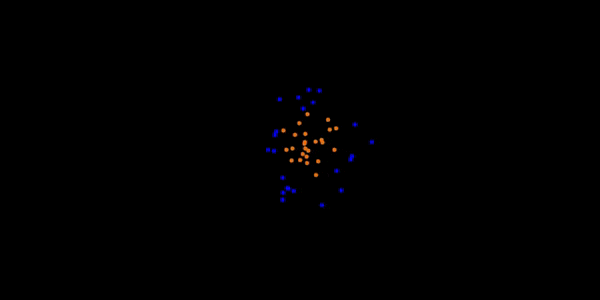

# Step-1: Import Functions and Libraries:

In [ ]:

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import RepeatedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Step-2: Load and Process the Dataset:


In [ ]:

# Load the dataset
data = pd.read_csv('Dataset.csv')
print(data.head())
print("Shape of the dataset:", data.shape)

# Clean and prepare the dataset
# If necessary, rename columns for clarity
data.rename(columns={'Xtrain': 'Feature1', 'Unnamed: 1': 'Feature2', 'Unnamed: 5': 'Feature2_test'}, inplace=True)
print(data.columns)

# Split the dataset into train and test sets
X_train = data[['Feature1', 'Feature2']].values
y_train = data['ytrain'].values

test_data = data.dropna(subset=['Xtest', 'Feature2_test'])  # Use the correct column name for 'Feature2_test'
X_test = test_data[['Xtest', 'Feature2_test']].values  # Ensure column names are correct
y_test = test_data['ytest'].values


    Xtrain  Unnamed: 1  ytrain  ytest     Xtest  Unnamed: 5
0 -0.15899     0.42398       1    0.0 -0.353060    -0.67390
1 -0.34793     0.47076       1    1.0 -0.227130     0.44732
2 -0.50461     0.35380       1    0.0  0.092898    -0.75352
3 -0.59677     0.11403       1    0.0  0.148240    -0.71847
4 -0.51843    -0.17252       1    0.0 -0.001512     0.16293
Shape of the dataset: (211, 6)
Index(['Feature1', 'Feature2', 'ytrain', 'ytest', 'Xtest', 'Feature2_test'], dtype='object')


#Step-3: SVM Train and Hyper-parameter Optimization:


In [ ]:

# Define the SVC model
model = SVC()

# Define cross-validation strategy
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

# Define the search space for hyper-parameters
search_space = {
    'kernel': ['rbf', 'linear'],
    'C': [1, 10, 100, 1000],
    'gamma': [1e-3, 1e-4]
}

# Setup the search
search = RandomizedSearchCV(model, search_space, n_iter=16, scoring='accuracy', cv=cv, random_state=1)

# Execute the search
result = search.fit(X_train, y_train)
print("Best Score:", result.best_score_)
print("Best Hyperparameters:", result.best_params_)

# Re-train the best model on the training data
best_model = SVC(**result.best_params_)
best_model.fit(X_train, y_train)


Best Score: 0.9225913621262459
Best Hyperparameters: {'kernel': 'linear', 'gamma': 0.001, 'C': 10}


SVC(C=10, gamma=0.001, kernel='linear')

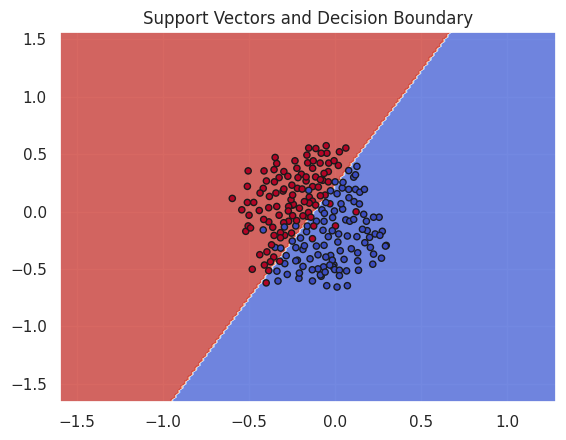

In [ ]:
# Function to plot decision boundary and support vectors
def plot_svc_decision_boundary(model, X, y):
    # Create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Make predictions for each point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape the predictions to match the shape of the meshgrid
    Z = Z.reshape(xx.shape)

    # Plot decision boundary. Assign a color to each point in the mesh
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('Support Vectors and Decision Boundary')
    plt.show()

plot_svc_decision_boundary(best_model, X_train, y_train)


Based on this plot, a linear SVC can be used to classify this data.


***However***, the presence of misclassified points implies that a non-linear approach might be needed to improve classification performance.

#Step-4: Test the SVM Model:

In [ ]:

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       113
         1.0       0.95      0.90      0.92        87

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200



**Model Performance:** The model demonstrates a high level of performance in classifying this particular dataset. It has managed to achieve strong results despite the apparent class overlap observed in the plot